In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
cities = ['SAN+FRANCISCO',
          'SAN+JOSE',
          'SANTA+CLARA',
          'SUNNYVALE',
          'MOUNTAIN+VIEW',
          'CUPERTINO',
          'MENLO+PARK',
          'PALO+ALTO',
          'REDWOOD+CITY',
          'SAN+MATEO'
         ]

jobs = ['SOFTWARE+ENGINEER',
        'SENIOR+SOFTWARE+ENGINEER'
       ]

links = []
for city in cities:
    for job in jobs:
        links.append('https://h1bdata.info/index.php?em=&job='+job+'&city='+city+'&year=All+Years')

# Scrape table data from each of the above links and store in a list
jobs_list = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list.append(row_data)

In [3]:
# Put everything into dataframes for easier processing
ds_jobs_df = pd.DataFrame()
ds_jobs_df['company'] = [i[0] for i in jobs_list]
ds_jobs_df['title'] = [i[1] for i in jobs_list]

ds_jobs_df['salary'] = [i[2].replace(',','') for i in jobs_list]
ds_jobs_df['salary'] = ds_jobs_df['salary'].astype(float)

ds_jobs_df['location'] = [i[3] for i in jobs_list]

ds_jobs_df['date'] = [i[4] for i in jobs_list]
ds_jobs_df['date'] = pd.to_datetime(ds_jobs_df['date'])
ds_jobs_df['year'] = [i.year for i in ds_jobs_df['date']]

# Drop pre 2015 data (very few observations pre 2015)
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['year']<2014].index, axis=0, inplace=True)

# Drop salaries over $400,000
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['salary']>400000].index, axis=0, inplace=True)

# Sort by company and year
ds_jobs_df.sort_values(by=['year','company'], inplace=True, ascending=True)

In [4]:
ds_jobs_df['year'].value_counts()

2018    10778
2019     8993
2017     8282
2016     7666
2015     7509
2014     1118
Name: year, dtype: int64

In [5]:
# Split city from state and take only city

city = []
state = []
for i in ds_jobs_df['location']:
    city.append(i.split(',')[0])
    state.append(i.split(',')[-1])
    
ds_jobs_df['city'] = city
ds_jobs_df['state'] = state
ds_jobs_df['location'] = city

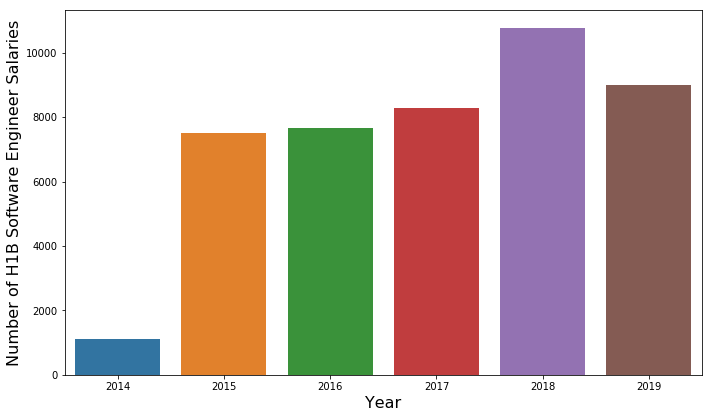

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=ds_jobs_df['year'].value_counts().sort_index().index, 
                 y=ds_jobs_df['year'].value_counts().sort_index().values)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Number of H1B Software Engineer Salaries",fontsize=16)
plt.tight_layout()
plt.savefig(fname='num_jobs', dpi=150)

In [7]:
ds_jobs_df['salary'].median()

126000.0

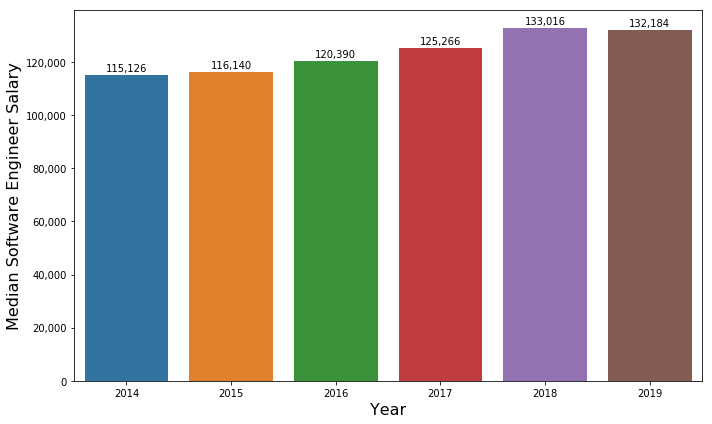

In [23]:
median_salary = ds_jobs_df.groupby(by=['year']).median().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=median_salary['year'], 
                 y=median_salary['salary'])
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
        ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-5000),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')

plt.tight_layout()
plt.savefig(fname='median_salary', dpi=150)

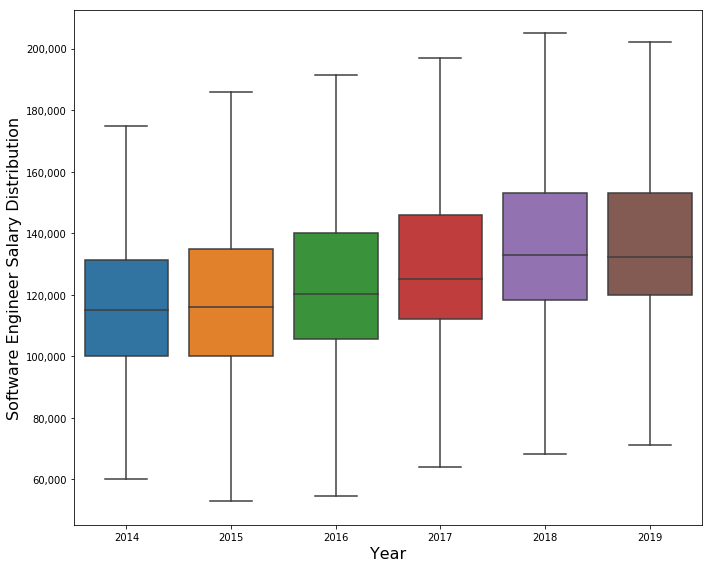

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='year', y='salary', data=ds_jobs_df, showfliers=False);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Software Engineer Salary Distribution",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='salary_box', dpi=150)

In [10]:
print('Software Enginner')

print('2014 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2014 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2014 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.75)))
print('\n')

print('2015 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2015 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2015 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.75)))
print('\n')

print('2019 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2019 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2019 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SOFTWARE ENGINEER')]['salary'].quantile(0.75)))

Software Enginner
2014 25th perctile: 100000.0
2014 50th perctile: 114296.5
2014 75th perctile: 130000.0


2015 25th perctile: 100000.0
2015 50th perctile: 115000.0
2015 75th perctile: 132500.0


2019 25th perctile: 120000.0
2019 50th perctile: 130000.0
2019 75th perctile: 150000.0


In [11]:
print('Senior Software Enginner')

print('2014 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2014 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2014 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2014) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.75)))
print('\n')

print('2015 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2015 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2015 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2015) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.75)))
print('\n')

print('2019 25th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.25)))
print('2019 50th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.50)))
print('2019 75th perctile: ' + str(ds_jobs_df[(ds_jobs_df['year']==2019) & 
                                              (ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER')]['salary'].quantile(0.75)))

Senior Software Enginner
2014 25th perctile: 110000.0
2014 50th perctile: 125000.0
2014 75th perctile: 135000.0


2015 25th perctile: 110000.0
2015 50th perctile: 127937.5
2015 75th perctile: 140000.0


2019 25th perctile: 132184.0
2019 50th perctile: 147597.0
2019 75th perctile: 164250.0


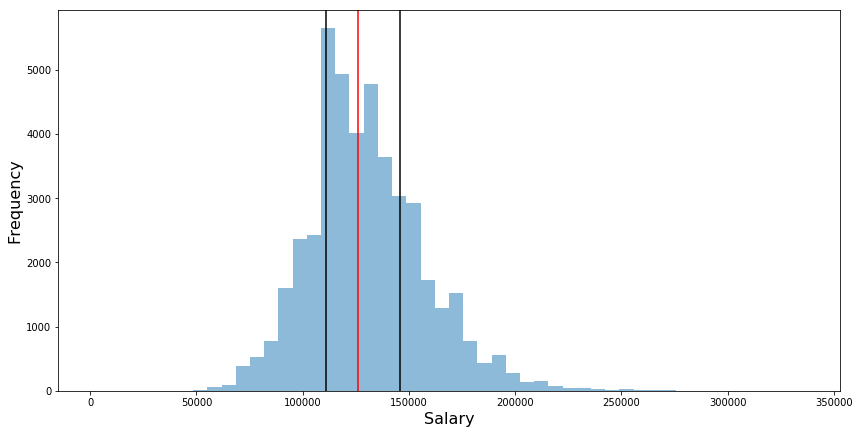

In [12]:
# Histogram of salaries
fig, ax = plt.subplots(figsize=(14,7))
ax = plt.hist(ds_jobs_df['salary'], bins=50, alpha=0.5)
plt.axvline(ds_jobs_df['salary'].quantile(0.25), c='black')
plt.axvline(ds_jobs_df['salary'].quantile(0.50), c='red')
plt.axvline(ds_jobs_df['salary'].quantile(0.75), c='black')

plt.xlabel('Salary',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.savefig(fname='salary_hist', dpi=150)
plt.show()

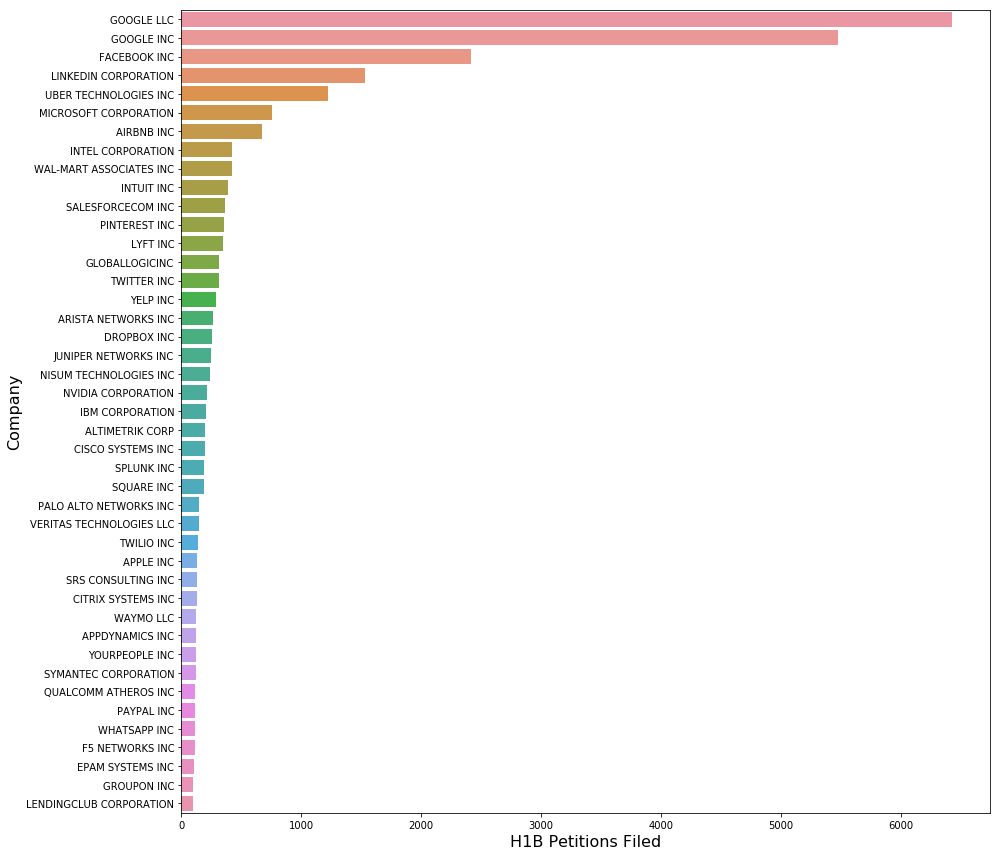

In [13]:
company_df = pd.DataFrame()
company_df['company'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['company']
company_df['count'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['salary']
company_df['salary'] = ds_jobs_df[['company','salary']].groupby(by=['company']).median().reset_index()['salary']
sorted_df = company_df.sort_values(by='salary', ascending=False)

sorted_df = company_df.sort_values(by='count', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=100]

fig, ax = plt.subplots(figsize=(14,12))
ax = sns.barplot(x=sorted_df['count'], 
                 y=sorted_df['company'])
ax.set_xlabel("H1B Petitions Filed",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
plt.tight_layout()
plt.savefig(fname='company_hired', dpi=150)

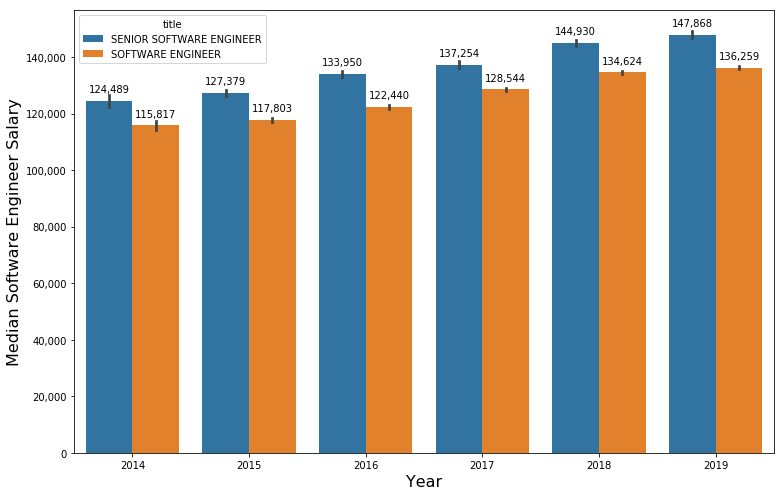

In [24]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x='year', y='salary', hue='title',
                 data=ds_jobs_df);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
        ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-3000),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
    
plt.tight_layout()
plt.savefig(fname='median_salary_swe_vs_senior', dpi=150)

In [15]:
# Compare Big Tech to Everyone Else
# No Netflix but leaving it in just in case
# new_tech = ['FACEBOOK INC', 'MICROSOFT CORPORATION', 'UBER TECHNOLOGIES INC',
#             'AIRBNB INC', 'GOOGLE INC', 'GOOGLE LLC', 'LYFT INC',
#             'APPLE INC', 'TWITTER INC', 'DROPBOX INC',
#             'SPOTIFY USA INC', 'STITCH FIX INC', 'SQUARE INC',
#             'PINTEREST INC', 'ZILLOW INC', 'LINKEDIN CORPORATION',
#             'SALESFORCECOM INC', 'QUORA INC', 'NETFLIX INC', 
#             'OPENDOOR LABS INC', 'CREDIT KARMA INC', 'YELP INC', 'FLEXPORT INC'
#            ]

new_tech = ['FACEBOOK INC', 'MICROSOFT CORPORATION', 'UBER TECHNOLOGIES INC', 'AIRBNB INC', 
            'GOOGLE INC', 'GOOGLE LLC', 'LYFT INC', 'APPLE INC', 'NETFLIX INC', 'LINKEDIN CORPORATION'
           ]

tech_df = ds_jobs_df[ds_jobs_df['company'].isin(new_tech)]
ds_jobs_df['is_tech'] = ds_jobs_df['company'].isin(new_tech)

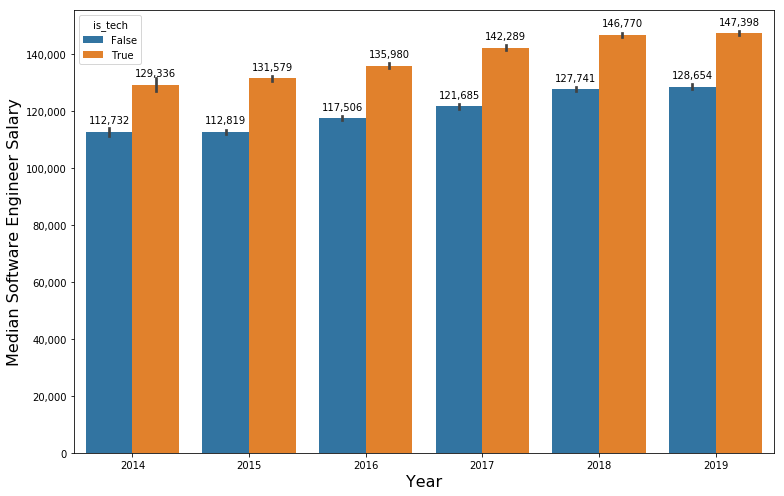

In [16]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x='year', y='salary', hue='is_tech',
                 data=ds_jobs_df);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
        ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-3000),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
    
plt.tight_layout()
plt.savefig(fname='median_salary_tech_vs', dpi=150)

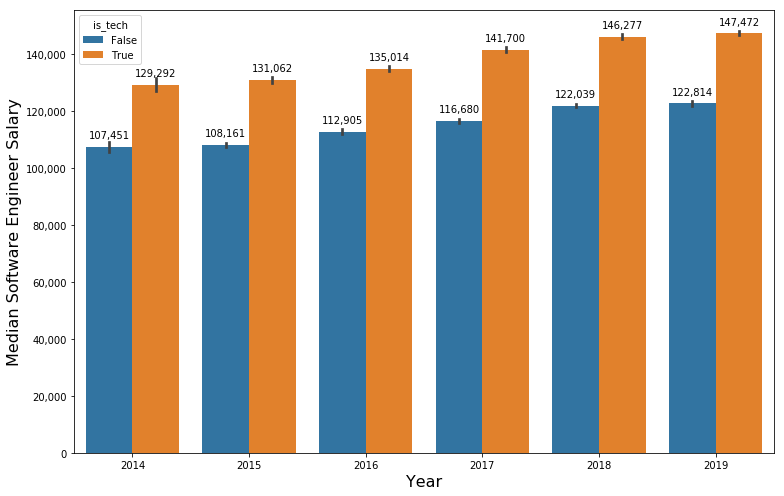

In [17]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x='year', y='salary', hue='is_tech',
                 data=ds_jobs_df[ds_jobs_df['title']=='SOFTWARE ENGINEER']);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
        ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-3000),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
    
plt.tight_layout()
plt.savefig(fname='median_salary_tech_vs_junior', dpi=150)

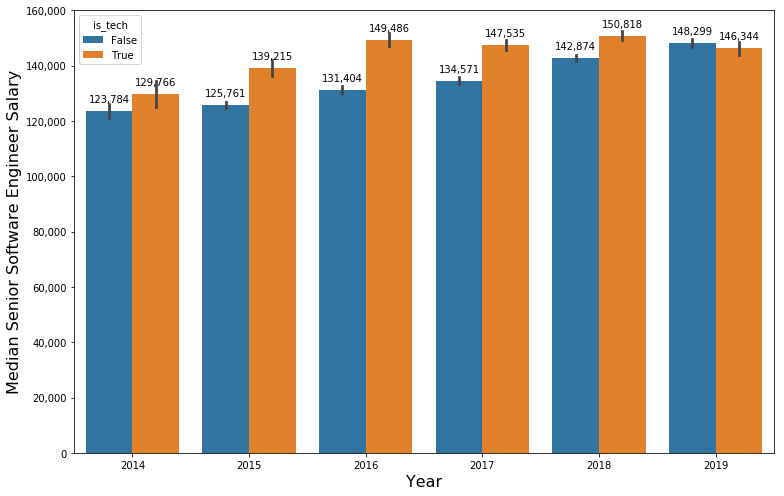

In [18]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x='year', y='salary', hue='is_tech',
                 data=ds_jobs_df[ds_jobs_df['title']=='SENIOR SOFTWARE ENGINEER']);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Senior Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
        ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-3000),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
    
plt.tight_layout()
plt.savefig(fname='median_salary_tech_vs_senior', dpi=150)

In [19]:
ds_jobs_df[ds_jobs_df['is_tech']==True]['title'].value_counts()

SOFTWARE ENGINEER           17388
SENIOR SOFTWARE ENGINEER     1592
Name: title, dtype: int64

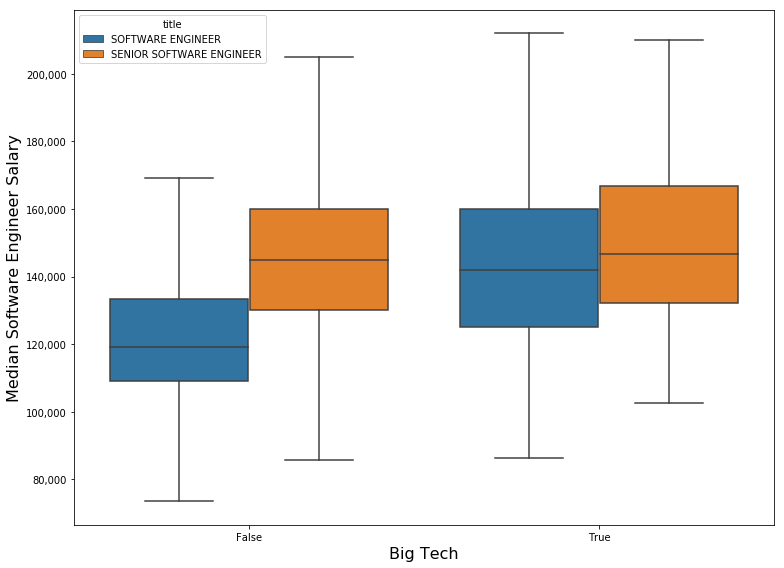

In [30]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.boxplot(x='is_tech', y='salary', hue='title',
                 data=ds_jobs_df[ds_jobs_df['year']>=2018], showfliers=False);
ax.set_xlabel("Big Tech",fontsize=16)
ax.set_ylabel("Median Software Engineer Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# for p in ax.patches:
#         ax.annotate('{:1,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-3000),
#              ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')

plt.tight_layout()
plt.savefig(fname='median_salary_trendy_tech_title', dpi=150)

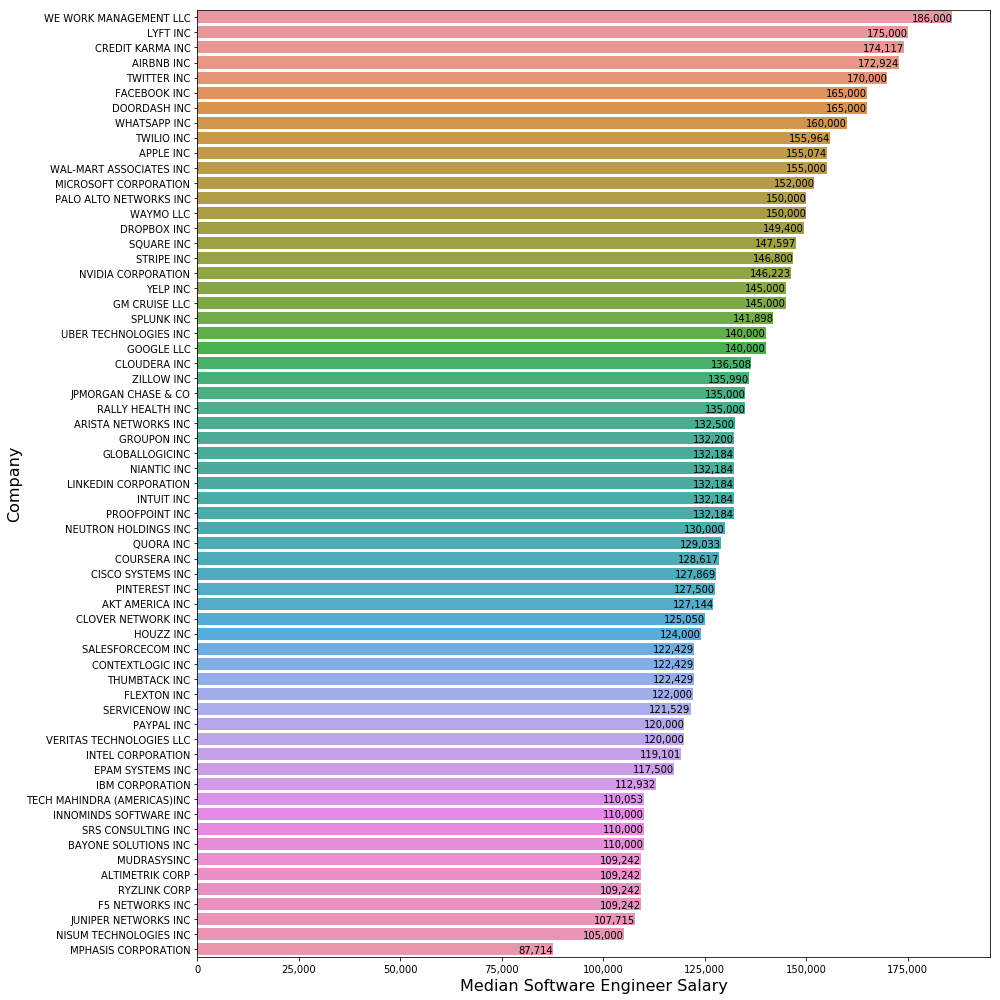

In [21]:
curr_salary = ds_jobs_df[ds_jobs_df['year']>=2018]

company_df = pd.DataFrame()
company_df['company'] = curr_salary[['company','salary']].groupby(by=['company']).count().reset_index()['company']
company_df['count'] = curr_salary[['company','salary']].groupby(by=['company']).count().reset_index()['salary']
company_df['salary'] = curr_salary[['company','salary']].groupby(by=['company']).median().reset_index()['salary']
sorted_df = company_df.sort_values(by='salary', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=30]

fig, ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x=sorted_df['salary'], 
                 y=sorted_df['company'])
ax.set_xlabel("Median Software Engineer Salary",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1,.0f}'.format(width),
             ha='right', va='center')

plt.tight_layout()
plt.savefig(fname='company_median_salary_current', dpi=150)